In [1]:
from __future__ import division
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

In [2]:
def dynamics(X, t, parameters):
    """Dynamics"""
    # Parameter(s)
    n, nN, a, b, c = parameters
    # State variable(s)
    x = X[1]
    y = X[2]
    z = X[3]
    # Derivative(s)
    dX_dt = np.zeros(nN+1)
    dX_dt[1] = - y - z
    dX_dt[2] = x + a * y
    dX_dt[3] = b + z * (x - c)
    # Jacobian
    J = np.array([(0, -1, -1), (1, a, 0), (z, 0, x - c)])
    # Linear system
    Y = np.array([(X[4], X[5], X[6]), (X[7], X[8], X[9]), (X[10], X[11], X[12])])
    # Linearized dynamics
    dX_dt[4:] = np.dot(J, Y).reshape(n*n)
    return dX_dt

In [3]:
# Dimensionality
n = 3
nN = n * (n + 1)

# Parameter(s)
a = 0.2
b = 0.2
c = 5.7
parameters = [n, nN, a, b, c]

In [4]:
# Initial state
X_i = np.zeros(nN+1)
for i in range(1, n+1):
    X_i[i*(n+1)] = 1.0

znorm = np.zeros(nN+1)
gsc = np.zeros(n+1)
cum = np.zeros(n+1)

# Number of iterations
nstep = 100000
# Time step of integration
dt = 0.01
# Duration of integration time per reorthonormalization
t_step = 1.0

for i in range(nstep):
    
    t_i = i * t_step
    t_f = (i + 1) * t_step
    t = np.arange(t_i, t_f, dt)
    # Solution
    X = odeint(dynamics, X_i, t, args = (parameters, ), rtol = 1e-10)
    
    # Construct a new orthonormal basis by Gram-Schmidt method
    
    # Normalize first vector
    znorm[1] = 0.0
    for j in range(1, n+1):
        znorm[1] = znorm[1] + X[-1, j*n+1]**2
    znorm[1] = np.sqrt(znorm[1])
    for j in range(1, n+1):
        X[-1, j*n+1] = X[-1, j*n+1] / znorm[1]
    
    # Generate the new orthonormal set of vectors
    for j in range(2, n+1):
        # Generate j-1 GSR coefficients
        for k in range(1, j):
            gsc[k] = 0.0
            for l in range(1, n+1):
                gsc[k] = gsc[k] + X[-1, l*n+j] * X[-1, l*n+k]
        # Construct a new vector
        for k in range(1, n+1):
            for l in range(1, j):
                X[-1, k*n+j] = X[-1, k*n+j] - gsc[l] * X[-1, k*n+l]
        # Calculate the vector's norm
        znorm[j] = 0.0
        for k in range(1, n+1):
            znorm[j] = znorm[j] + X[-1, k*n+j]**2
        znorm[j] = np.sqrt(znorm[j])
        # Normalize the new vector
        for k in range(1, n+1):
            X[-1, k*n+j] = X[-1, k*n+j] / znorm[j]
    
    # Update running vector magnitudes
    for k in range(1, n+1):
        if znorm[k] > 0:
            cum[k] = cum[k] + np.log(znorm[k])
    
    # Setting up the initial condition(s) for the next iteration
    X_i = X[-1, :]

('Lyapunov Exponents: ', array([  7.16000000e-02,   1.00000000e-04,  -5.34160000e+00]))


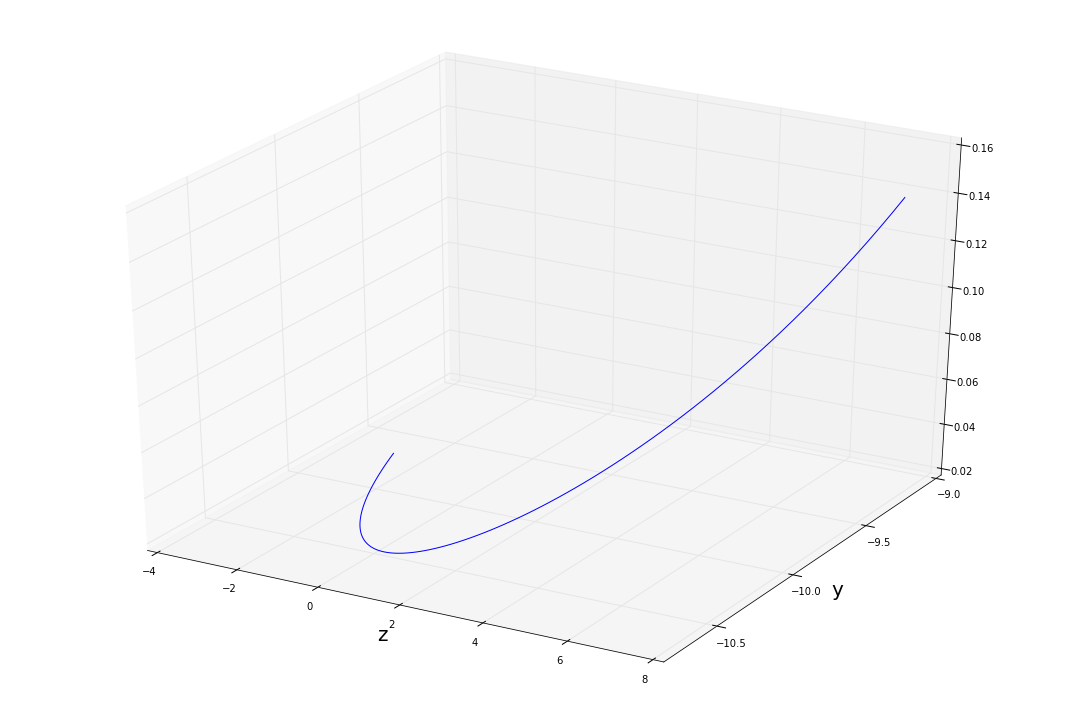

In [5]:
# Normalize exponent(s)
le = cum / t[-1]
print('Lyapunov Exponents: ', np.round(le[1:], 4))

# Printing (Phase space)
plt.figure(figsize = (15, 10))
ax = plt.axes(projection = '3d')
ax.plot3D(X[:, 1], X[:, 2], X[:, 3])
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.xlabel('z', fontsize = 20)
plt.tight_layout()